**Bölüm 1 – Büyük Ölçekli Sentetik Veri Seti Oluşturma**

Bu bölümde, iş arayan ajanları temsil eden büyük ölçekli bir sentetik veri seti oluşturulmaktadır.
Her ajan; demografik, eğitim, teknik beceri, davranışsal ve sosyoekonomik faktörleri kapsayan 300 adet yapılandırılmış öznitelik ile tanımlanmaktadır.
Seçili özniteliklerden türetilen gizli bir iş bulma potansiyeli (job potential) skoru hesaplanmakta ve gerçekçi istihdam çıktıları elde edilmektedir.

 Oluşturulan sentetik veri seti, ileri analizlerde ve simülasyon bileşeninde kullanılmak üzere Excel formatında kaydedilmektedir.

In [2]:
import numpy as np
import pandas as pd

# ==============================
# Parameters
# ==============================
N_AGENTS = 500           # Simülasyondaki toplam ajan sayısı
SEED = 42                # Sonuçların tekrar üretilebilir olması için sabit seed
np.random.seed(SEED)

# ==============================
# 1️⃣ Define 300 named attributes
#    300 adet isimlendirilmiş özellik (feature) tanımlama
# ==============================
demographics = [f'dem_{i+1}' for i in range(10)]
education = [f'edu_{i+1}' for i in range(30)]
technical_skills = [f'tech_{i+1}' for i in range(50)]
soft_skills = [f'soft_{i+1}' for i in range(30)]
work_experience = [f'work_{i+1}' for i in range(20)]
job_search = [f'jobsearch_{i+1}' for i in range(20)]
digital_footprint = [f'digital_{i+1}' for i in range(30)]
personality = [f'pers_{i+1}' for i in range(30)]
socioeconomic = [f'socio_{i+1}' for i in range(20)]
health = [f'health_{i+1}' for i in range(10)]
extra_attributes = [f'extra_{i+1}' for i in range(50)]

# Tüm özellikleri tek bir liste altında birleştirdim.
attribute_names = (
    demographics + education + technical_skills + soft_skills +
    work_experience + job_search + digital_footprint +
    personality + socioeconomic + health + extra_attributes
)

print(f"Total attributes: {len(attribute_names)}")  # MUST be 300

# ==============================
# 2️⃣ Generate BASE synthetic data
#    Temel sentetik veri üretimi
# ==============================
features = np.random.rand(N_AGENTS, len(attribute_names))
agents_df = pd.DataFrame(features, columns=attribute_names)
agents_df.insert(0, 'agent_id', np.arange(N_AGENTS))

# ==============================
# 3️⃣ Create STRUCTURED latent scores
#    Yapılandırılmış gizli (latent) skorların oluşturulması
#    Bu skorlar, çok sayıda özelliği özetleyip iş potansiyelini hesaplamayı kolaylaştırmak için oluşturuldu.
# ==============================
agents_df['tech_score'] = agents_df[technical_skills].mean(axis=1)   # Teknik beceri skoru
agents_df['soft_score'] = agents_df[soft_skills].mean(axis=1)        # Soft skill skoru
agents_df['edu_score'] = agents_df[education].mean(axis=1)           # Eğitim skoru
agents_df['work_score'] = agents_df[work_experience].mean(axis=1)    # Deneyim skoru
agents_df['job_search_score'] = agents_df[job_search].mean(axis=1)   # İş arama skoru

# ==============================
# 4️⃣ Job-finding potential (CORE TARGET)
#    İş bulma potansiyeli (ANA HEDEF DEĞİŞKEN)
#    İş potansiyeli, her ajanın iş bulma şansını tek bir skor ile göstermek için hesaplanır.
# ==============================
agents_df['job_potential'] = (
    0.35 * agents_df['tech_score'] +
    0.25 * agents_df['soft_score'] +
    0.20 * agents_df['edu_score'] +
    0.15 * agents_df['work_score'] +
    0.05 * agents_df['job_search_score']
)

# Normalize job potential to [0,1]
# İş potansiyeli skorunu 0-1 aralığına normalize etme
# Skor 0-1 arasına getirilir, böylece veriler kolayca karşılaştırılabilir ve analiz edilebilir.
agents_df['job_potential'] = (
    agents_df['job_potential'] - agents_df['job_potential'].min()
) / (
    agents_df['job_potential'].max() - agents_df['job_potential'].min()
)

# ==============================
# 5️⃣ Employment outcome (NOT random)
#   İstihdam durumu (RASTGELE DEĞİL)
# ==============================
agents_df['has_job'] = agents_df['job_potential'] > np.random.uniform(0.45, 0.75, N_AGENTS)

agents_df['round_hired'] = np.where(
    agents_df['has_job'],
    np.random.randint(1, 6, size=N_AGENTS),
    -1
)

agents_df['applications_made'] = (
    (1 - agents_df['job_potential']) * np.random.randint(5, 30, size=N_AGENTS)
).astype(int)

# ==============================
# 6️⃣ Drop helper columns
#    Yardımcı kolonların silinmesi
# ==============================
agents_df.drop(
    columns=['tech_score', 'soft_score', 'edu_score', 'work_score', 'job_search_score'],
    inplace=True
)

# ==============================
# 7️⃣ Save dataset
# ==============================
agents_df.to_excel('agents_300_named_FINAL.xlsx', index=False)
print("✅ Saved structured dataset: agents_300_named_FINAL.xlsx")

# Preview
agents_df.head()


Total attributes: 300
✅ Saved structured dataset: agents_300_named_FINAL.xlsx


,agent_id,dem_1,dem_2,dem_3,dem_4,dem_5,dem_6,dem_7,dem_8,dem_9,...,extra_45,extra_46,extra_47,extra_48,extra_49,extra_50,job_potential,has_job,round_hired,applications_made
0,0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,...,0.127061,0.522243,0.769994,0.215821,0.622890,0.085347,0.358882,False,-1,10
1,1,0.051682,0.531355,0.540635,0.637430,0.726091,0.975852,0.516300,0.322956,0.795186,...,0.896788,0.473962,0.667558,0.172320,0.192289,0.040869,0.445824,False,-1,12
2,2,0.168935,0.278590,0.177010,0.088703,0.120636,0.460779,0.206334,0.364270,0.503417,...,0.668085,0.204984,0.293148,0.896336,0.013002,0.085509,0.323367,False,-1,19
3,3,0.207886,0.026532,0.181435,0.583042,0.421425,0.892672,0.817444,0.341817,0.259423,...,0.045742,0.871537,0.973489,0.968878,0.749652,0.130086,0.550673,False,-1,4
4,4,0.758263,0.024587,0.022124,0.323610,0.488643,0.770407,0.683295,0.445903,0.273627,...,0.603449,0.668213,0.619490,0.463494,0.379786,0.863334,0.401528,False,-1,9


**Bölüm 2 – Ajan Tabanlı İşgücü Piyasası Simülasyonu**

Bu bölümde, ajan tabanlı bir işgücü piyasası simülasyonu uygulanmaktadır.
İş arayan ajanlar, piyasa zorluk seviyesi ve bireysel iş potansiyellerine bağlı olarak simüle edilmiş bir işgücü piyasası ile etkileşime girmektedir.
Simülasyon birden fazla tur boyunca çalıştırılmakta ve istihdam dinamikleri kayıt altına alınmaktadır.

Aşağıda yer alan grafikler, simülasyon süresince istihdamın zamansal gelişimini, işe alım davranışlarını ve iş potansiyeli ile işe alınma zamanı arasındaki ilişkiyi görselleştirmektedir.

,agent_id,employed,round_hired,job_potential
0,0,False,NaN,0.278844
1,1,False,NaN,0.285300
2,2,True,9.0,0.445026
3,3,True,1.0,0.832241
4,4,True,7.0,0.566611


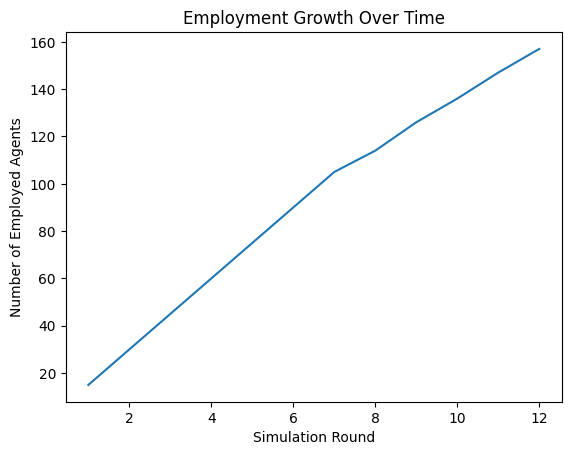

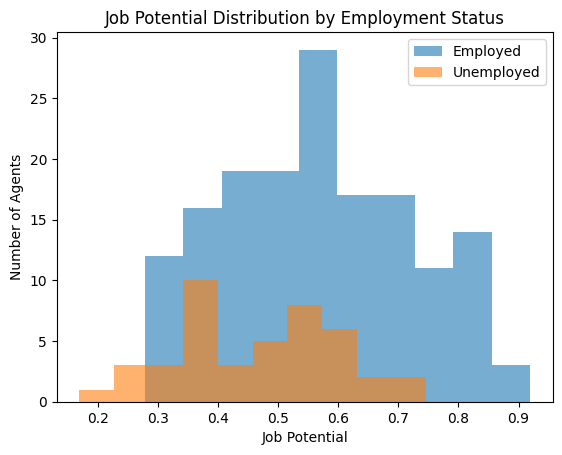

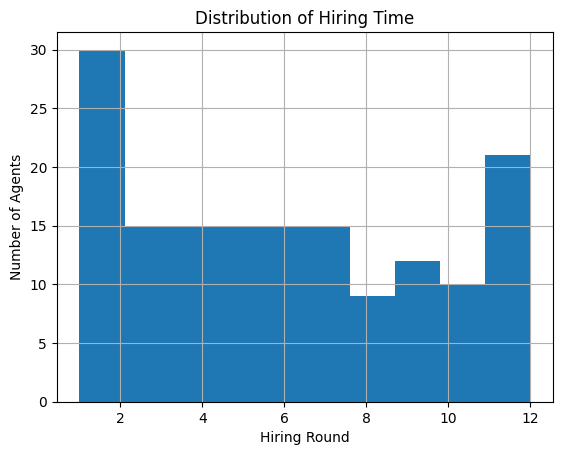

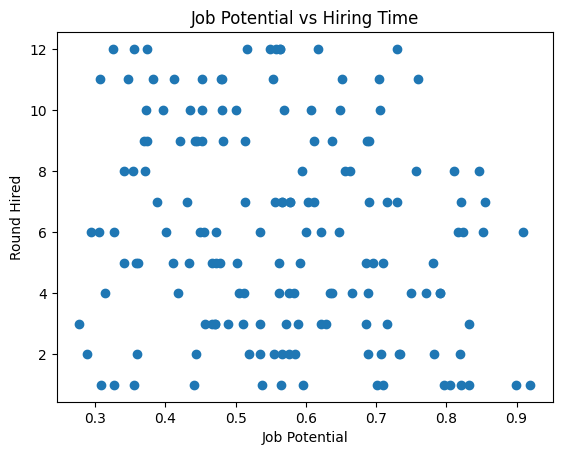

In [2]:
import random
import pandas as pd
import numpy as np

random.seed(42)
np.random.seed(42)

# JobSeekerAgent class
# Her ajanın özelliklerini ve iş durumunu tutar (gözlemlenen ve gizli özellikler)

class JobSeekerAgent:
    def __init__(self, agent_id, attributes):
        """
        Initialize a job seeker agent.

        Parameters:
        - agent_id: unique identifier
        - attributes: dictionary containing agent features
        """
        self.agent_id = agent_id

        # Observable attributes
        self.education = attributes.get("education")
        self.skills = attributes.get("skills")
        self.experience = attributes.get("experience")
        self.job_search_intensity = attributes.get("job_search_intensity")
        self.digital_presence = attributes.get("digital_presence")

        # Hidden attribute (latent)
        self.job_potential = attributes.get("job_potential")

        # State
        self.employed = False
        self.round_hired = None

        # Data validation
        assert 0 <= self.job_search_intensity <= 1
        assert 0 <= self.job_potential <= 1


    def apply_for_jobs(self):
        """
        Decide whether the agent applies for a job in this round.
        """
        if self.employed:
            return False

        # Probability of applying depends on job search intensity
        probability = min(1.0, self.job_search_intensity)
        return random.random() < probability

# //////////////////////////////////////////

# LaborMarket class
# İş piyasasını simüle eder, başvuruları değerlendirir, işe alım olasılığı job_potential ve zorluk ile belirlenir

class LaborMarket:
    def __init__(self, jobs_per_round, market_difficulty):
        """
        Initialize the labor market environment.

        Parameters:
        - jobs_per_round: number of available jobs each round
        - market_difficulty: hiring strictness (0–1)
        """
        self.jobs_per_round = jobs_per_round
        self.market_difficulty = market_difficulty

    def evaluate_applicants(self, applicants):
        """
        Evaluate applicants and select hires probabilistically.
        """
        hired_agents = []

        # Shuffle applicants to avoid ordering bias
        random.shuffle(applicants)

        for agent in applicants:
            if len(hired_agents) >= self.jobs_per_round:
                break

            # Hiring probability depends on latent job potential
            # hiring_probability = agent.job_potential * (1 - self.market_difficulty)
            # Add small market uncertainty
            effective_difficulty = self.market_difficulty + random.uniform(-0.05, 0.05)
            effective_difficulty = min(max(effective_difficulty, 0), 1)

            hiring_probability = agent.job_potential * (1 - effective_difficulty)


            if random.random() < hiring_probability:
                hired_agents.append(agent)

        return hired_agents

# ////////////////////////////////////////////

# generate_agents function
# Ajanları oluşturur, gözlemlenen özellikler rastgele üretilir
# Latent job_potential, özelliklerin ağırlıklı ortalaması ile hesaplanır

def generate_agents(num_agents):
    agents = []

    for i in range(num_agents):
        # Generate observable attributes
        attributes = {
            "education": random.choice([0, 1, 2, 3]),  # education levels
            "skills": random.uniform(0.2, 1.0),
            "experience": random.uniform(0, 5),
            "job_search_intensity": random.uniform(0.3, 1.0),
            "digital_presence": random.uniform(0.2, 1.0)
        }

        # STEP 2: Build latent job_potential from observable features
        job_potential = (
            0.3 * attributes["skills"] +
            0.3 * (attributes["education"] / 3) +
            0.2 * (attributes["experience"] / 5) +
            0.2 * attributes["digital_presence"]
        )

        # Ensure value is within [0, 1]
        job_potential = min(1.0, job_potential)

        # Add latent variable to attributes
        attributes["job_potential"] = job_potential

        agent = JobSeekerAgent(i, attributes)
        agents.append(agent)

    return agents



# //////////////////////////////////////////////////


# run_simulation function
# Simülasyonu çalıştırır, her turda başvurular değerlendirilir, durum güncellenir
# Tüm ajanlar işe alınırsa simülasyon erken durur

def run_simulation(agents, labor_market, max_rounds=12):
    """
    Run the agent-based simulation.
    """
    results = []

    for current_round in range(1, max_rounds + 1):
        applicants = []

        # Agents decide whether to apply
        for agent in agents:
            if agent.apply_for_jobs():
                applicants.append(agent)

        # Labor market evaluates applicants
        hired_agents = labor_market.evaluate_applicants(applicants)

        # Update states
        for agent in hired_agents:
            agent.employed = True
            agent.round_hired = current_round

        # Collect statistics
        employed_count = sum(agent.employed for agent in agents)

        employment_rate = employed_count / len(agents)

        results.append({
            "round": current_round,
            "employed_agents": employed_count,
            "unemployed_agents": len(agents) - employed_count ,
            "employment_rate": employment_rate
        })

        # Stop early if all agents are employed
        if employed_count == len(agents):
            break

    return pd.DataFrame(results), agents

# /////////////////////////////////////////////

# Create agents
# 200 ajan oluşturulur

agents = generate_agents(num_agents=200)

# Create labor market
# İş piyasası oluşturulur: 15 iş, 0.4 zorluk
labor_market = LaborMarket(
    jobs_per_round=15,
    market_difficulty=0.4
)

# Run simulation
# Simülasyonu başlatır ve sonuçları döndürür

simulation_results, final_agents = run_simulation(
    agents,
    labor_market,
    max_rounds=12
)

simulation_results

# /////////////////////////////////////////////////

# Final employment summary
# Her ajan için işe alındı mı ve hangi turda işe girdi bilgilerini tablo olarak gösterir
employment_data = pd.DataFrame([
    {
        "agent_id": agent.agent_id,
        "employed": agent.employed,
        "round_hired": agent.round_hired,
        "job_potential": agent.job_potential
    }
    for agent in final_agents
])


from IPython.display import display

display(employment_data.head())



# /////////////////////////////////////
# Visulaization

import matplotlib.pyplot as plt

plt.figure()
plt.plot(simulation_results["round"], simulation_results["employed_agents"])
plt.xlabel("Simulation Round")
plt.ylabel("Number of Employed Agents")
plt.title("Employment Growth Over Time")
plt.show()



plt.figure()
plt.hist(
    employment_data[employment_data["employed"] == True]["job_potential"],
    alpha=0.6,
    label="Employed"
)
plt.hist(
    employment_data[employment_data["employed"] == False]["job_potential"],
    alpha=0.6,
    label="Unemployed"
)
plt.xlabel("Job Potential")
plt.ylabel("Number of Agents")
plt.title("Job Potential Distribution by Employment Status")
plt.legend()
plt.show()


plt.figure()
employment_data["round_hired"].dropna().hist()
plt.xlabel("Hiring Round")
plt.ylabel("Number of Agents")
plt.title("Distribution of Hiring Time")
plt.show()


plt.figure()
plt.scatter(
    employment_data["job_potential"],
    employment_data["round_hired"]
)
plt.xlabel("Job Potential")
plt.ylabel("Round Hired")
plt.title("Job Potential vs Hiring Time")
plt.show()



#NEW dataset for the binary classifactions:


In [2]:
# ==========================================
# STRONG EMPLOYMENT DATASET (LEARNABLE)
# ==========================================

import numpy as np
import pandas as pd

N = 500
np.random.seed(42)

# -------------------------------
# Feature groups
# -------------------------------
signal_features = {
    "tech": [f"tech_{i}" for i in range(1, 11)],
    "work": [f"work_{i}" for i in range(1, 11)],
    "edu":  [f"edu_{i}"  for i in range(1, 6)],
    "search": [f"jobsearch_{i}" for i in range(1, 6)]
}

noise_features = [f"noise_{i}" for i in range(1, 271)]

columns = sum(signal_features.values(), []) + noise_features

# -------------------------------
# Generate data
# -------------------------------
X = np.random.normal(0, 1, (N, len(columns)))
df = pd.DataFrame(X, columns=columns)
df.insert(0, "agent_id", range(N))

# -------------------------------
# Strong employment rule
# -------------------------------
employability = (
    2.5 * df[signal_features["tech"]].mean(axis=1) +
    2.0 * df[signal_features["work"]].mean(axis=1) +
    1.5 * df[signal_features["edu"]].mean(axis=1) +
    1.2 * df[signal_features["search"]].mean(axis=1)
)

# Small noise only
employability += np.random.normal(0, 0.2, N)

threshold = np.percentile(employability, 50)
df["has_job"] = (employability > threshold).astype(int)

# -------------------------------
# Auxiliary (NO leakage)
# -------------------------------
df["applications_made"] = np.random.randint(5, 50, N)
df["round_hired"] = np.where(df["has_job"] == 1,
                             np.random.randint(1, 5, N), 0)

# -------------------------------
# Save
# -------------------------------
print(df["has_job"].value_counts())
df.to_excel("agents_strong_clean.xlsx", index=False)
print("✅ Dataset saved")


has_job
0    250
1    250
Name: count, dtype: int64
✅ Dataset saved


#Using ML Models

Loading dataset...
Target balance:
has_job
0    250
1    250
Name: count, dtype: int64

Training Logistic Regression...

Training SVM...

Training Random Forest...

Training HistGB...


<Figure size 1000x800 with 0 Axes>

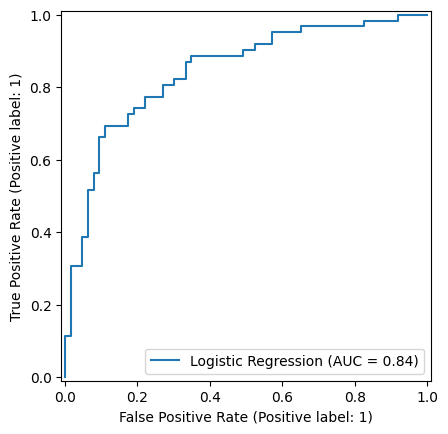

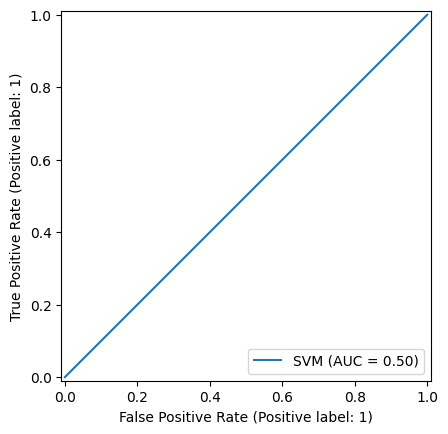

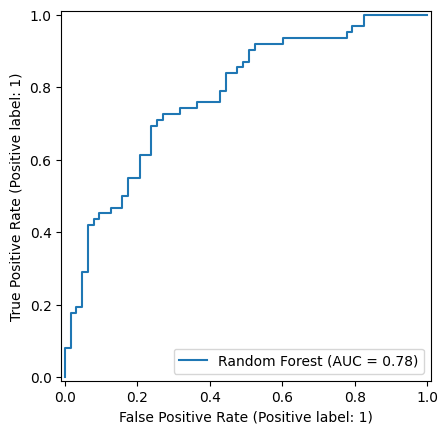

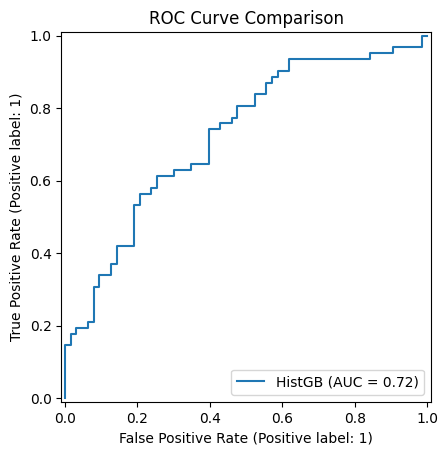


===== MODEL COMPARISON =====


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.768,0.761905,0.774194,0.768000,0.843574
2,Random Forest,0.704,0.692308,0.725806,0.708661,0.777266
3,HistGB,0.664,0.638889,0.741935,0.686567,0.724014
1,SVM,0.496,0.496000,1.000000,0.663102,0.500000



Best model: Logistic Regression


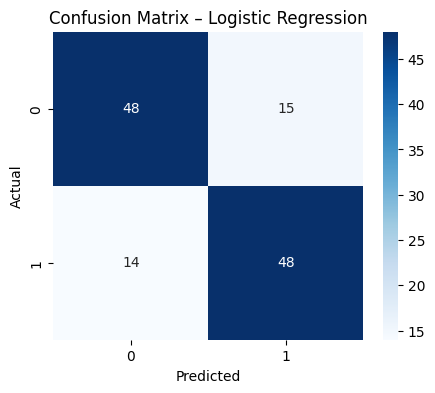


Top 20 Important Features:


,Feature,Importance
9,tech_10,0.020849
25,jobsearch_1,0.017815
16,work_7,0.014361
6,tech_7,0.011868
26,jobsearch_2,0.010992
22,edu_3,0.010612
23,edu_4,0.010054
3,tech_4,0.009970
24,edu_5,0.009493
5,tech_6,0.008839


In [29]:
# =========================================================
# JOB FINDING PREDICTION - FULL ML PIPELINE
# =========================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import HistGradientBoostingClassifier


from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay
)

import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# 1️⃣ Load Dataset
# =============================
print("Loading dataset...")
df = pd.read_excel("agents_strong_clean.xlsx")

LEAKAGE_COLS = [
    "agent_id",
    "has_job",
    "job_potential",
    "round_hired",
    "applications_made"
]

y = df["has_job"].astype(int)
X = df.drop(columns=LEAKAGE_COLS, errors="ignore")

print("Target balance:")
print(y.value_counts())

# =============================
# 2️⃣ Train / Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

# =============================
# 3️⃣ Feature Selection
# =============================

X_train_sel = X_train.values
X_test_sel = X_test.values
selected_features = X.columns


# =============================
# 4️⃣ Models
# =============================
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(
            max_iter=3000,
            C=3,
            class_weight="balanced"
        ))
    ]),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(
            kernel="rbf",
            C=10,
            gamma=0.1,
            class_weight="balanced",
            probability=True
        ))
    ]),

    "Random Forest": RandomForestClassifier(
        n_estimators=800,
        max_depth=18,
        min_samples_leaf=3,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),

    "HistGB": HistGradientBoostingClassifier(
        max_depth=6,
        learning_rate=0.03,
        max_iter=500,
        random_state=42
    )
}


# =============================
# 5️⃣ Train & Evaluate
# =============================
results = []

plt.figure(figsize=(10, 8))

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_sel, y_train)

    y_pred = model.predict(X_test_sel)
    y_proba = model.predict_proba(X_test_sel)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })

    RocCurveDisplay.from_predictions(y_test, y_proba, name=name)

plt.title("ROC Curve Comparison")
plt.show()

# =============================
# 6️⃣ Results
# =============================
results_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)

print("\n===== MODEL COMPARISON =====")
display(results_df)

# =============================
# 7️⃣ Confusion Matrix (Best Model)
# =============================
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBest model: {best_model_name}")

y_pred_best = best_model.predict(X_test_sel)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix – {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =============================
# 8️⃣ Feature Importance (RF)
# =============================
rf = models["Random Forest"]
importances = rf.feature_importances_

importance_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("\nTop 20 Important Features:")
display(importance_df.head(20))


# =============================
# SAVE BEST MODEL
# =============================

BEST_MODEL_NAME = "Logistic Regression"
best_model = models[BEST_MODEL_NAME]

# Fit best model on FULL dataset (recommended for deployment)
best_model.fit(X.values, y)

# Save model
joblib.dump(best_model, "job_model.pkl")

# Save feature names
joblib.dump(list(X.columns), "model_features.pkl")

print("✅ Model and features saved successfully")


Loading dataset...
Target balance:
has_job
0    250
1    250
Name: count, dtype: int64

Training Logistic Regression...

Training SVM...

Training Random Forest...

Training HistGB...


<Figure size 1000x800 with 0 Axes>

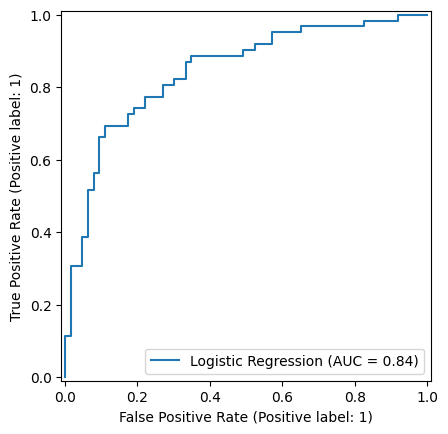

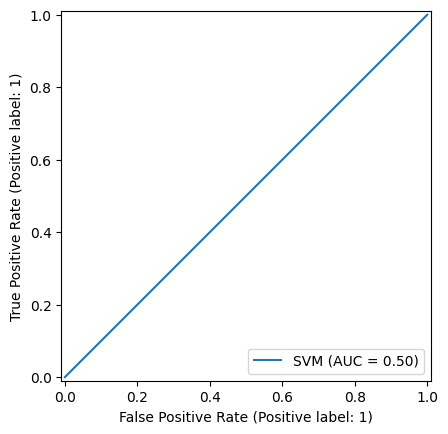

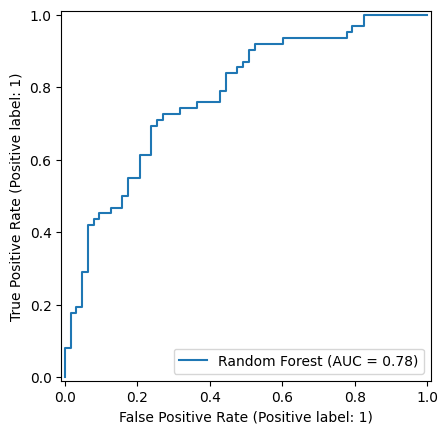

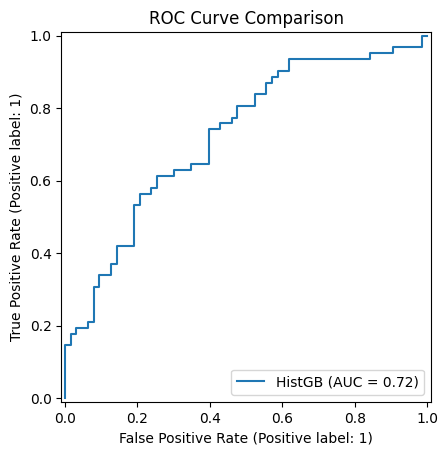


===== MODEL COMPARISON =====


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.768,0.761905,0.774194,0.768000,0.843574
2,Random Forest,0.704,0.692308,0.725806,0.708661,0.777266
3,HistGB,0.664,0.638889,0.741935,0.686567,0.724014
1,SVM,0.496,0.496000,1.000000,0.663102,0.500000



Best model: Logistic Regression


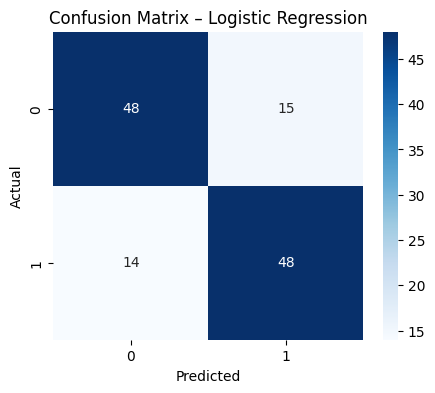

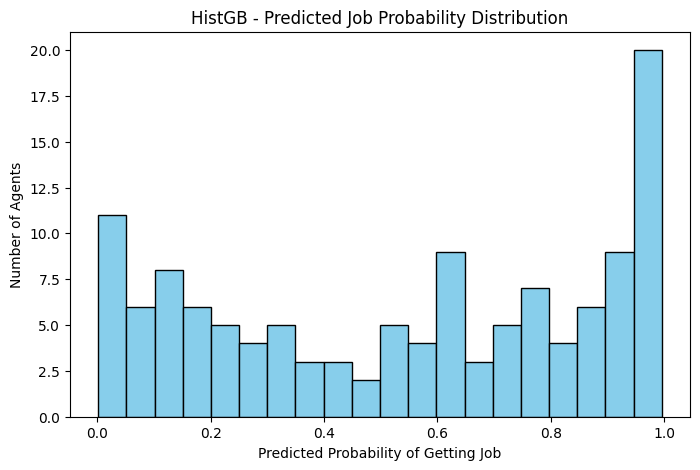


Top 20 Important Features:


,Feature,Importance
9,tech_10,0.020849
25,jobsearch_1,0.017815
16,work_7,0.014361
6,tech_7,0.011868
26,jobsearch_2,0.010992
22,edu_3,0.010612
23,edu_4,0.010054
3,tech_4,0.009970
24,edu_5,0.009493
5,tech_6,0.008839


✅ Model and features saved successfully


In [7]:
# =========================================================
# JOB FINDING PREDICTION - FULL ML PIPELINE
# =========================================================

import numpy as np
import pandas as pd

import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import HistGradientBoostingClassifier


from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay
)

import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# 1️⃣ Load Dataset
# =============================
print("Loading dataset...")
df = pd.read_excel("agents_strong_clean.xlsx")

LEAKAGE_COLS = [
    "agent_id",
    "has_job",
    "job_potential",
    "round_hired",
    "applications_made"
]

y = df["has_job"].astype(int)
X = df.drop(columns=LEAKAGE_COLS, errors="ignore")

print("Target balance:")
print(y.value_counts())

# =============================
# 2️⃣ Train / Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

# =============================
# 3️⃣ Feature Selection
# =============================

X_train_sel = X_train.values
X_test_sel = X_test.values
selected_features = X.columns


# =============================
# 4️⃣ Models
# =============================
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(
            max_iter=3000,
            C=3,
            class_weight="balanced"
        ))
    ]),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(
            kernel="rbf",
            C=10,
            gamma=0.1,
            class_weight="balanced",
            probability=True
        ))
    ]),

    "Random Forest": RandomForestClassifier(
        n_estimators=800,
        max_depth=18,
        min_samples_leaf=3,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),

    "HistGB": HistGradientBoostingClassifier(
        max_depth=6,
        learning_rate=0.03,
        max_iter=500,
        random_state=42
    )
}


# =============================
# 5️⃣ Train & Evaluate
# =============================
results = []

plt.figure(figsize=(10, 8))

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_sel, y_train)

    y_pred = model.predict(X_test_sel)
    y_proba = model.predict_proba(X_test_sel)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })

    RocCurveDisplay.from_predictions(y_test, y_proba, name=name)

plt.title("ROC Curve Comparison")
plt.show()

# =============================
# 6️⃣ Results
# =============================
results_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)

print("\n===== MODEL COMPARISON =====")
display(results_df)

# =============================
# 7️⃣ Confusion Matrix (Best Model)
# =============================
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBest model: {best_model_name}")

y_pred_best = best_model.predict(X_test_sel)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix – {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(y_proba, bins=20, color='skyblue', edgecolor='black')
plt.title(f'{name} - Predicted Job Probability Distribution')
plt.xlabel('Predicted Probability of Getting Job')
plt.ylabel('Number of Agents')
plt.show()

# =============================
# 8️⃣ Feature Importance (RF)
# =============================
rf = models["Random Forest"]
importances = rf.feature_importances_

importance_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("\nTop 20 Important Features:")
display(importance_df.head(20))


# =============================
# SAVE BEST MODEL
# =============================

BEST_MODEL_NAME = "Logistic Regression"
best_model = models[BEST_MODEL_NAME]

# Fit best model on FULL dataset (recommended for deployment)
best_model.fit(X.values, y)

# Save model
joblib.dump(best_model, "job_model.pkl")

# Save feature names
joblib.dump(list(X.columns), "model_features.pkl")

print("✅ Model and features saved successfully")
